# 1 神经网络
将再次处理手写数字数据集。这次使用反向传播的前馈神经网络，自动学习神经网络的参数。
## 1.1 数据可视化
这部分的数据和ex3里是一样的，5000张20*20像素的手写数字数据集，以及对应的数字（1-9，0对应10）

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat
from sklearn.preprocessing import OneHotEncoder

In [3]:
data = loadmat('E:\机器学习(吴恩达)\ML数据\ml_ex4\ex4data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [4]:
X = data['X']
y = data['y']
X.shape, y.shape   # 显示维度

((5000, 400), (5000, 1))

In [5]:
weight = loadmat('E:\机器学习(吴恩达)\ML数据\ml_ex4\ex4weights.mat')
theta1, theta2 = weight['Theta1'], weight['Theta2']
theta1.shape, theta2.shape

((25, 401), (10, 26))

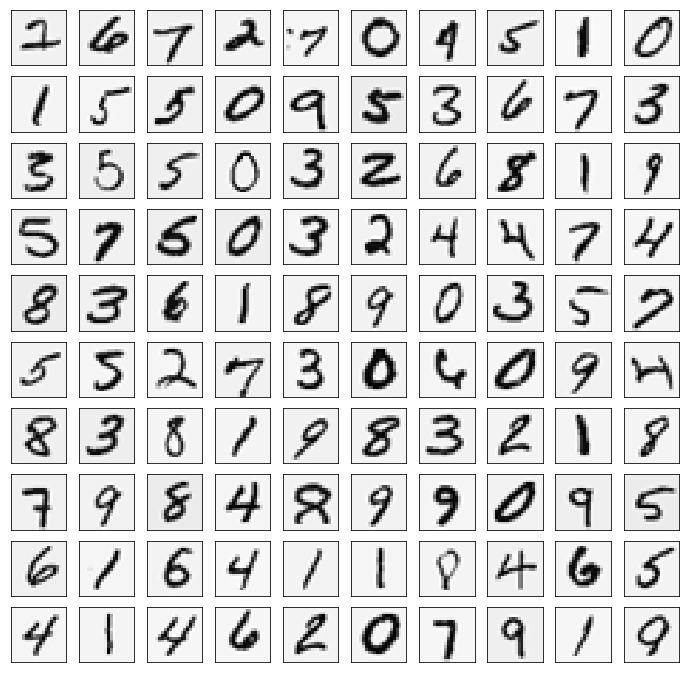

In [6]:
sample_idx = np.random.choice(np.arange(data['X'].shape[0]), 100)
sample_images = data['X'][sample_idx, :]
fig, ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(12, 12))
for r in range(10):
    for c in range(10):
        ax_array[r, c].matshow(np.array(sample_images[10 * r + c].reshape((20, 20))).T, cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))

## 1.2 模型展示（同ex3的第二部分）

## 1.3 前向传播和代价函数

实现神经网络的代价函数和梯度函数（适用于任何数据集 包括任意数量的输入输出单元）

In [ ]:
def sigmiod(z):
    return 1 / (1 + np.exp(-z))

In [7]:
#前向传播函数
def forward_propagate(X, theta1, theta2):
    m = X.shape[0]
    
    a1 = np.insert(X, 0, values=np.ones(m), axis=1)
    z2 = a1 * theta1.T
    a2 = np.insert(sigmiod(z2), 0, values=np.ones(m), axis=1)
    z3 = a2 * theta2.T
    h = sigmiod(z3)
    
    return a1, z2, a2, z3, h